In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

print('Success')

Success


### Изучение итоговой таблицы

Загрузим получившийся датасет и взглянем на него "с высоты птичьего полёта"

In [2]:
data = pd.read_csv('matching_results.csv')

In [30]:
data

,Vacancy,Employer,Vac_salary,Vac_salary_from,Vac_salary_to,Vac_exp,Vac_schedule,Vac_description,Vac_prof_roles,Vac_specializations,...,CV_name,CV_specializations,CV_profar_names,CV_exp,CV_schedule,CV_employment,CV_area_name,CV_salary_from,CV_salary_to,Matching_Skills
0,Golang Developer (Кипр),Space307,True,251322.0,Не указана,От 3 до 6 лет,Полный день,Мы в Space307 разрабатываем международную торг...,"['Программист', 'разработчик']","['Программирование', 'Разработка']",...,Golang Middle Backend разработчик,"'Программирование, Разработка', 'Телекоммуника...","'Информационные технологии, интернет, телеком'",От 1 года до 3 лет,Полный день,Полная занятость,Орел,80000.0,100000.0,20
1,Е-mail маркетолог,Монополия,True,60900.0,Не указана,От 1 года до 3 лет,Полный день,С 2015 года наш IT блок меняет рынок автотранс...,['Менеджер по маркетингу и рекламе'],['Маркетинг'],...,Администратор интернет-магазина / SMM-менеджер,"'Продажи', 'Контент', 'CRM системы', 'Электрон...","'Маркетинг, реклама, PR', 'Продажи', 'Информац...",От 1 года до 3 лет,Полный день,Полная занятость,Москва,40000.0,NaN,30
2,Оператор call-центра (удаленно),Eden Springs,False,Не указана,Не указана,От 1 года до 3 лет,Удаленная работа,Что нужно будет делать: Принимать входящие зв...,"['Оператор call-центра', 'специалист контактно...","['Маркетинг', ""'Продажи по телефону"", 'Телемар...",...,Специалист поддержки пользователей интернет по...,"'Инженер', 'Поддержка, Helpdesk', 'Продажи по ...","'Продажи', 'Информационные технологии, интерне...",От 1 года до 3 лет,Полный день,Полная занятость,Новосибирск,22000.0,30000.0,60
3,Ведущий SMM специалист,Импорт Хоум,True,60000.0,80000.0,От 1 года до 3 лет,Полный день,В данный момент мы ищем в нашу команду самого ...,"['SMM-менеджер', 'контент-менеджер']","['Управление маркетингом', ""'PR"", 'Маркетингов...",...,Web-designer (Веб-дизайнер UI/UX) в веб-студию,"'Начальный уровень, Мало опыта', 'Арт-директор...","'Искусство, развлечения, масс-медиа', 'Маркети...",Нет опыта,Полный день,Полная занятость,Москва,55000.0,80000.0,40
4,UX/UI Designer,Pride Games Studio,False,Не указана,Не указана,От 1 года до 3 лет,Полный день,Pride Games Studio — это команда единомышленни...,"['Дизайнер', 'художник']","['Игровое ПО', ""'Программирование"", 'Разработк...",...,Middle UI/UX designer,"'Дизайн, графика, живопись', 'Стартапы'","'Искусство, развлечения, масс-медиа', 'Информа...",От 3 до 6 лет,Удаленная работа,Полная занятость,Санкт-Петербург,150000.0,NaN,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33582,Системный аналитик (DWH),Лига Ставок,False,Не указана,Не указана,От 1 года до 3 лет,Полный день,Обязанности: Сбор и анализ бизнес-требований....,['Аналитик'],"['Инженер', ""'Управление проектами"", ""'Техниче...",...,QA инженер (Тестировщик),'Тестирование',"'Информационные технологии, интернет, телеком'",От 1 года до 3 лет,Полный день,Полная занятость,Санкт-Петербург,100000.0,NaN,20
33583,Монтажник слаботочных систем,A-N SECURITY,True,60000.0,Не указана,От 1 года до 3 лет,Полный день,Обязанности: ведение технической документации...,"['Сервисный инженер', 'механик']","['Передача данных и доступ в интернет', ""'Сете...",...,Инженер-установщик ОПС,"'Программирование, Разработка', 'Инженер', 'Се...","'Безопасность', 'Производство, сельское хозяйс...",От 1 года до 3 лет,Сменный график,Полная занятость,Москва,70000.0,150000.0,20
33584,Менеджер по работе с маркетплейсами (офис),Market Warrior,True,50000.0,Не указана,От 1 года до 3 лет,Полный день,"Мы молодая команда, занимающаяся помощью в раб...",['Координатор отдела продаж'],['Управление проектами'],...,Менеджер по продажам (входящие заявки),"'Продажи', 'Продажа финансовых продуктов', 'Пр...","'Банки, инвестиции, лизинг', 'Спортивные клубы...",От 1 года до 3 лет,Полный день,Полная занятость,Москва,80000.0,NaN,30
33585,"Менеджер по продажам (Серверное оборудование, ...",Кон.Трол,True,120000.0,300000.0,От 1 года до 3 лет,Полный день,GAGAR&gt;IN ( ГК &quot;Con.Tr

Теперь примерно сравним, совпадают ли скиллы в строках

In [6]:
data['Vac_keys']

0        ['Docker', "'Golang", "'Redis", "'Английский я...
1        ['Грамотность', "'Написание текстов", "'Грамот...
2        ['Клиентоориентированность', "'Ориентация на р...
3        ['Продвижение бренда', "'Креативность", "'Adob...
4        ['UI', "'UX", "'gamedev", "'game design", "'пр...
                               ...                        
33582    ['SQL', "'Ведение документации", "'Сбор и анал...
33583    ['Мобильность', "'Работа в команде", "'Системы...
33584    ['Работа с большим объемом информации', "'Упра...
33585    ['B2B Продажи', "'Ведение переговоров", "'CRM"...
33586                                              ['SQL']
Name: Vac_keys, Length: 33587, dtype: object

In [7]:
data['CV_keys']

0        ['Git', "'Redis", "'MySQL", "'PostgreSQL", "'G...
1        ['Наполнение контентом', "'Написание текстов",...
2        ['Техническая поддержка', "'Консультирование к...
3        ['Web-дизайн', "'Полиграфический дизайн", "'We...
4         ['UI', "'Английский язык", "'UX", "'Web Design"]
                               ...                        
33582    ['SQL', "'Java", "'Функциональное тестирование...
33583    ['Инженерные системы', "'Пуско-наладочные рабо...
33584    ['Активные продажи', "'Грамотная речь", "'MS P...
33585    ['B2B Продажи', "'Прямые продажи", "'Навыки ме...
33586    ['SQL', "'JavaScript", "'Системный анализ", "'...
Name: CV_keys, Length: 33587, dtype: object

**Посмотрим, сколько каких совпадений мы имеем**

In [32]:
data['Matching_Skills'].value_counts()

Matching_Skills
30     10160
40      7590
20      7327
50      3211
10      3096
60      1034
70       514
80       252
90       154
110       74
100       72
120       31
150       18
130       18
170       12
140       12
280        2
180        2
160        2
230        1
290        1
260        1
200        1
210        1
190        1
Name: count, dtype: int64

Text(0, 0.5, 'Количество пар')

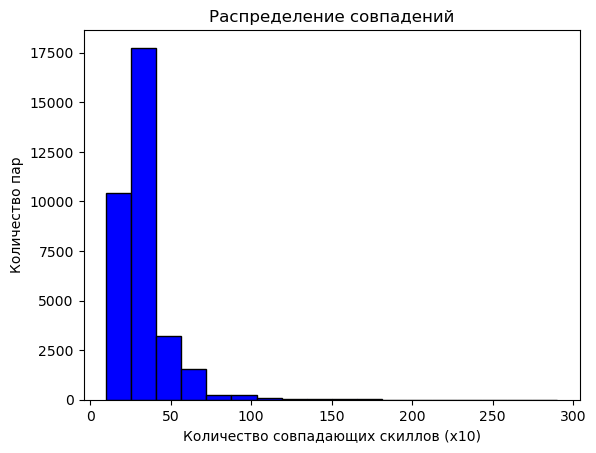

In [28]:
plt.hist(data['Matching_Skills'],
         color = 'blue',
         edgecolor = 'black',
         bins = int(180/10))

plt.title('Распределение совпадений')
plt.xlabel('Количество совпадающих скиллов (х10)')
plt.ylabel('Количество пар')

**Для удобства обучения нормализуем веса**

In [39]:
scaler = MinMaxScaler()
data['Matching_Skills'] = scaler.fit_transform(data['Matching_Skills'].values.reshape(-1, 1))

In [41]:
data['Matching_Skills'].value_counts()

Matching_Skills
0.071429    10160
0.107143     7590
0.035714     7327
0.142857     3211
0.000000     3096
0.178571     1034
0.214286      514
0.250000      252
0.285714      154
0.357143       74
0.321429       72
0.392857       31
0.500000       18
0.428571       18
0.571429       12
0.464286       12
0.964286        2
0.607143        2
0.535714        2
0.785714        1
1.000000        1
0.892857        1
0.678571        1
0.714286        1
0.642857        1
Name: count, dtype: int64

**На данном этапе предобработка данных объявляется закрытой! В случае чего, удалять столбцы, что-то менять в датасете будем уже в процессе экспериментов**